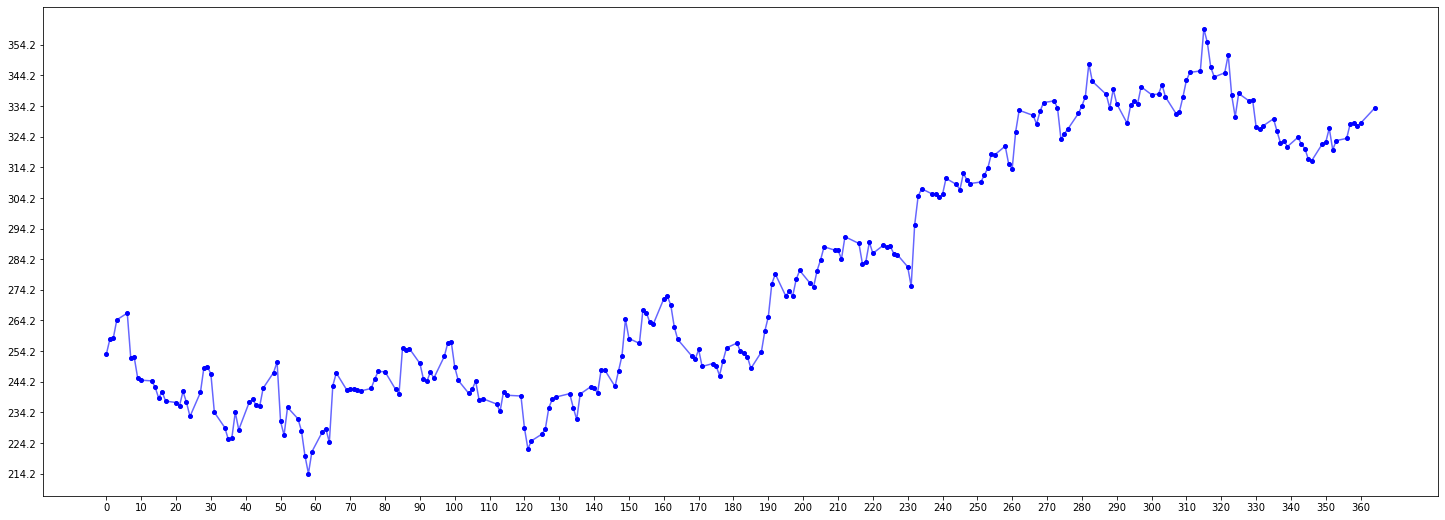

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import time
from time import mktime
from datetime import datetime

df = pd.read_csv('/home/max/MSFT.csv', parse_dates = True)
days = [datetime.fromtimestamp(mktime(time.strptime(df['Date'][i], '%Y-%m-%d'))) for i in range(df.shape[0])]
days_by_ind = [(days[i] - days[0]).days for i in range(df.shape[0])]
sales = pd.DataFrame(data = {'Day': days_by_ind, 'Close': df['Close']})

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25, 9))
plt.plot(np.array(sales['Day']), np.array(sales['Close']), 'ob', alpha = 1, markersize = 4)
plt.plot(np.array(sales['Day']), np.array(sales['Close']), 'b', alpha = 0.6)
plt.xticks(np.arange(0, max(days_by_ind), 10));
plt.yticks(np.arange(min(sales['Close']), max(sales['Close']), 10));

In [74]:
def make_plot(series1, series2, days1, days2, name_of_second_plot = ''):
    plt.figure(figsize=(20, 9))
    plt.subplot(2, 1, 1);
    plt.plot(np.array(days1), np.array(series1), 'ob', alpha = 1, markersize = 4);
    plt.plot(np.array(days1), np.array(series1), 'b', alpha = 0.6);
    plt.xticks(np.arange(0, max(days1), 10));
    plt.yticks(np.arange(min(series1), max(series1), 10));
    plt.title('Исходный ряд')

    plt.subplot(2, 1, 2);
    plt.plot(np.array(days2), np.array(series2), "og");
    plt.plot(np.array(days2), np.array(series2), "g");
    plt.xticks(np.arange(0, max(days_by_ind), 10));
    plt.title(name_of_second_plot)
    #plt.yticks(np.arange(min(sales['Close']), max(sales['Close']), 10));




## Скользящее среднее

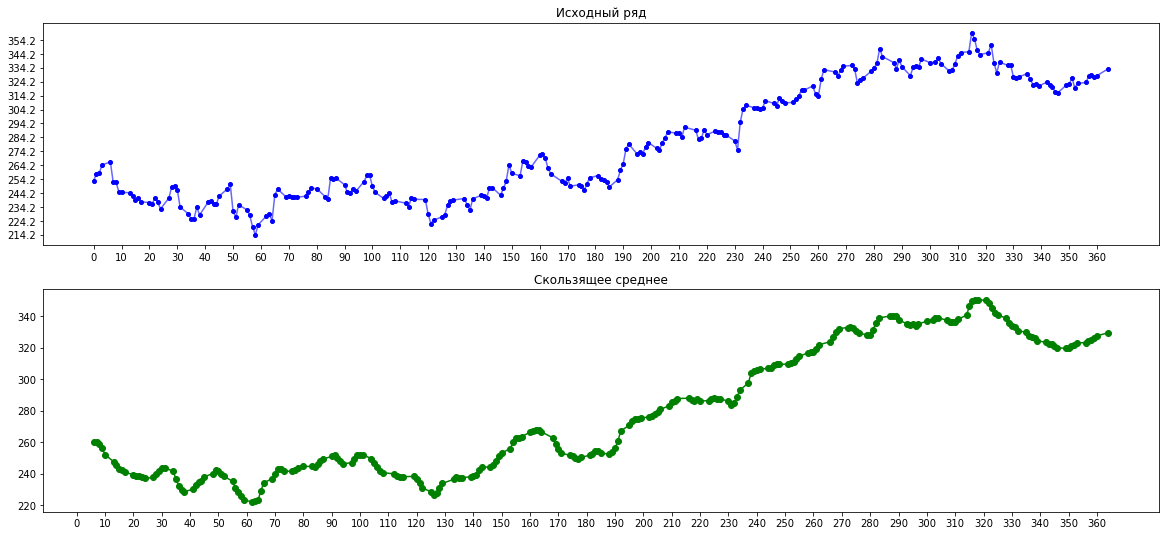

In [68]:
n = 5
make_plot(sales['Close'], sales['Close'].rolling(window=n).mean(), sales['Day'], sales['Day'], 'Скользящее среднее')


## Модель Хольта-Винтерса

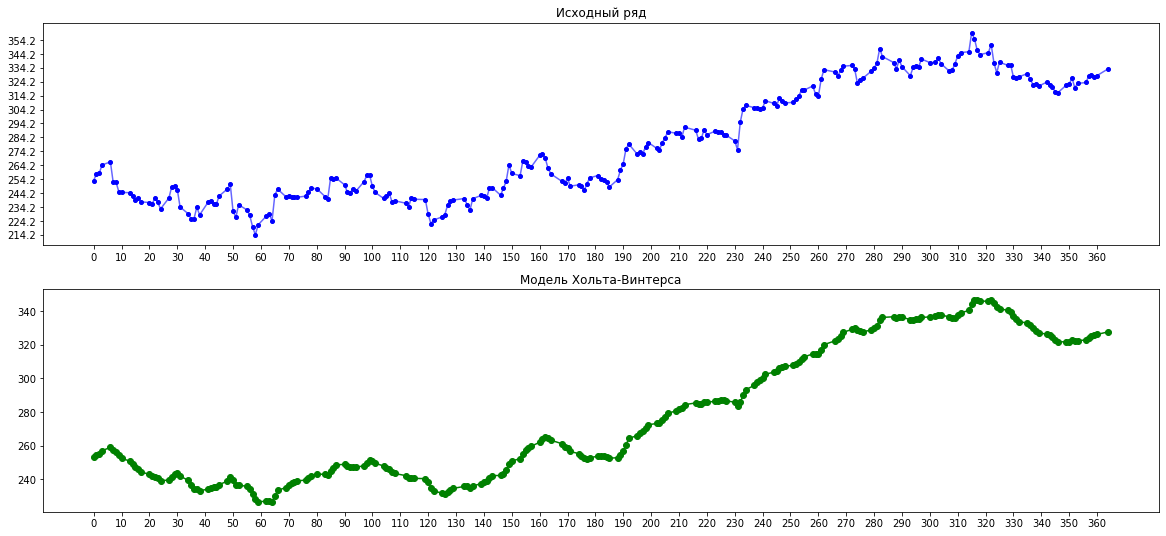

In [69]:
#определим функцию экспоненциального сглаживания
def exponential_smoothing(series, alpha_parameter):
    smoothed_series = [series[0]]
    for i in range(1, len(series)):
        smoothed_series.append(alpha_parameter * series[i] + (1 - alpha_parameter) * smoothed_series[i - 1])
    return smoothed_series

alpha = 0.2
exp_series = exponential_smoothing(sales['Close'], alpha)
make_plot(sales['Close'], exp_series, sales['Day'], sales['Day'], 'Модель Хольта-Винтерса')

# Функционалы
## Функционал "Энергия"

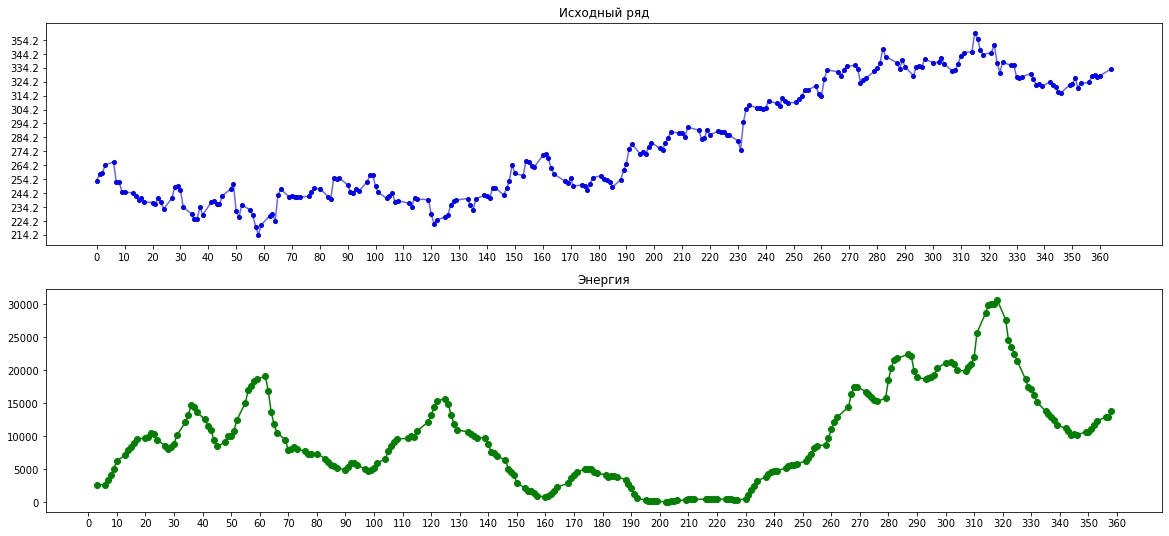

In [70]:
def energy_functional(series, delta):
    energy_value = []
    mean_of_series = series.mean()
    for i in range(delta, len(series) - delta):
        energy_value.append(np.array([(series[j] - mean_of_series) ** 2 for j in range(i - delta, i + delta)]).sum())
    return energy_value

delta = 3
energy_for_cur_series = energy_functional(np.array(sales['Close']), delta)
new_days = [sales['Day'][i] for i in range(delta, len(np.array(sales['Close'])) - delta)]
make_plot(sales['Close'], energy_for_cur_series, sales['Day'], new_days, 'Энергия')

# Функционалы
## Функционал "Длина"

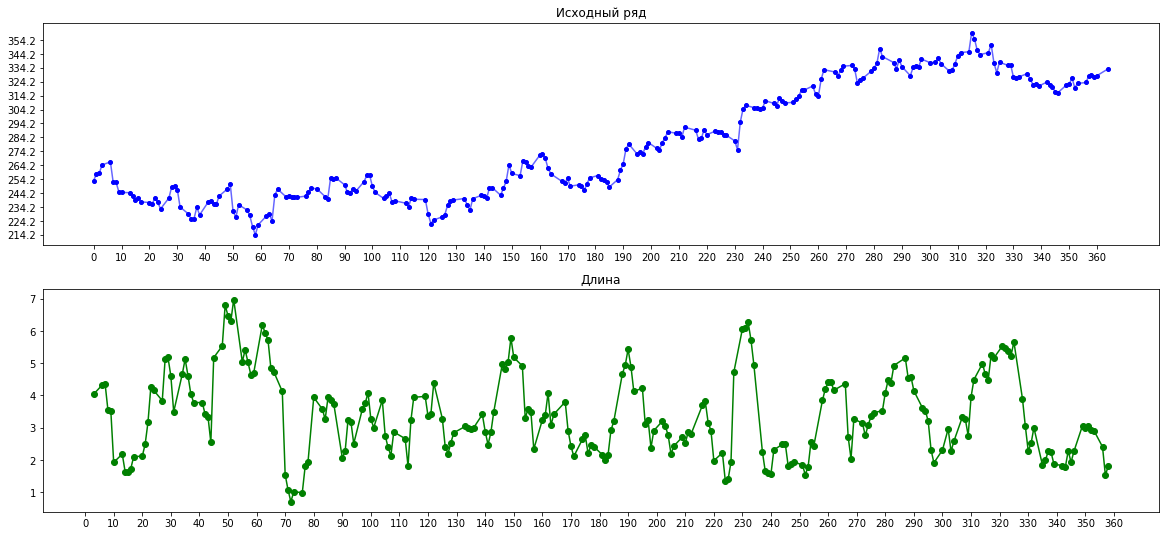

In [71]:
def length_functional(series, delta):
    energy_value = []
    for i in range(delta, len(series) - delta):
        energy_value.append(np.array([abs(series[j + 1] - series[j]) / (2 * delta + 1) for j in range(i - delta, i + delta)]).sum())
    return energy_value

delta = 3
length_for_cur_series = length_functional(np.array(sales['Close']), delta)
new_days = [sales['Day'][i] for i in range(delta, len(np.array(sales['Close'])) - delta)]
make_plot(sales['Close'], length_for_cur_series, sales['Day'], new_days, 'Длина')

# Функционалы
## Функционал "Осцилляция"

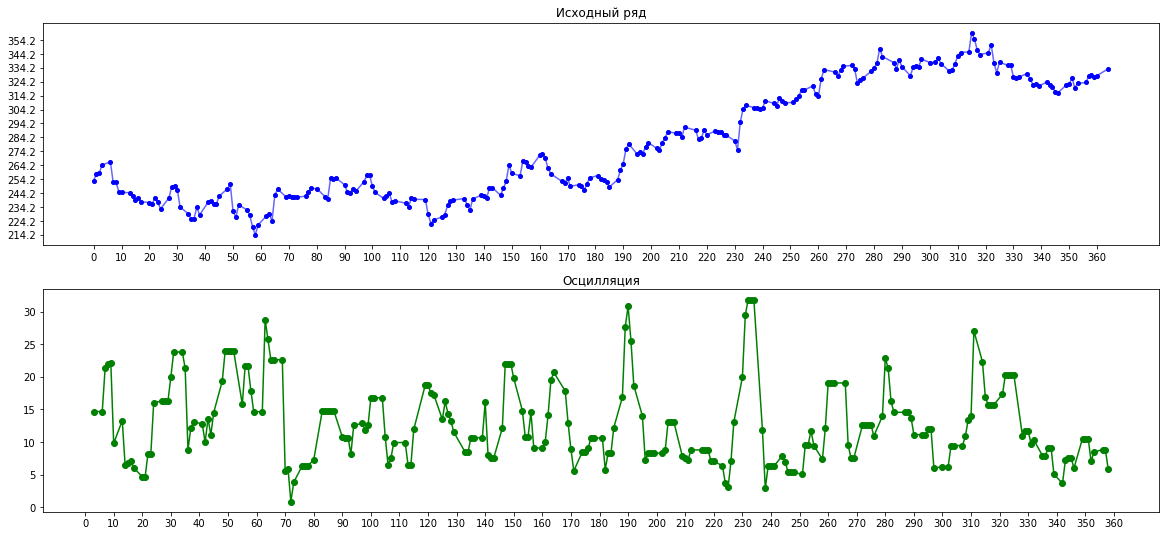

In [72]:
def min_max_functional(series, delta):
    energy_value = []
    for i in range(delta, len(series) - delta):
        sub_series = [series[j] for j in range(i - delta, i + delta)]
        energy_value.append(max(sub_series) - min(sub_series))
    return energy_value

delta = 3
min_max_for_cur_series = min_max_functional(np.array(sales['Close']), delta)
new_days = [sales['Day'][i] for i in range(delta, len(np.array(sales['Close'])) - delta)]
make_plot(sales['Close'], min_max_for_cur_series, sales['Day'], new_days, 'Осцилляция')

## Логарифмирование

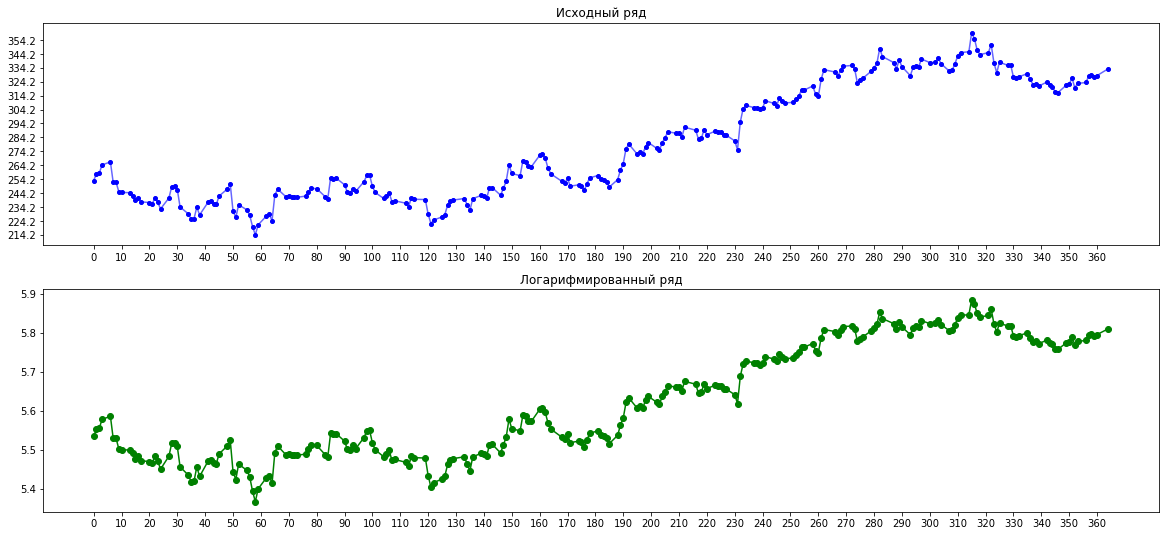

In [73]:
log_series = np.log(np.array(sales['Close']))
make_plot(sales['Close'], log_series, sales['Day'], sales['Day'], 'Логарифмированный ряд')